<a href="https://colab.research.google.com/github/TVHM/summer_microcredentials_BUS/blob/main/Copy_of_Stock_Market_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perform Stock market data analysis

PG -  Procter & Gamble (Cosumer Goods)
F -   Ford             (Automotive)
M -   Macy's           (Consumer Retail)
WFC-  Wells Fargo      (Banking)
DUK - DUKE             (Energy)
NGG  
VZ    Verizon            (Telecommunications)
JNJ   Johnson & Johnson  (Pharmaceuticals)
TDOC  Teladoc            (Telemedicine)

# Task 1 - Environment Set Up


In [478]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [479]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
# from pandas_datareader import DataReader
import yfinance as yf
# For time stamps
from datetime import datetime



In [480]:
# For division
from __future__ import division


# Task 2 - Data Collection

Gather stock data for Apple, Google, Microsoft and Amazon

In [481]:
# The tech stocks we'll use for this analysis
tech_list = ['PG','F','WFC','DUK','NGG','VZ','PFE','JNJ','M','TDOC']
import datetime
from datetime import datetime



# Set up End and Start times for data grab
end = datetime.now()
start = datetime(2019,3,1)


#For loop for grabing yahoo finance data and setting as a dataframe

for stock in tech_list:
  # Set DataFrame as the Stock Ticker
  globals()[stock] = yf.download(stock,start,end)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Text(0.5, 1.0, 'Stock Prices')

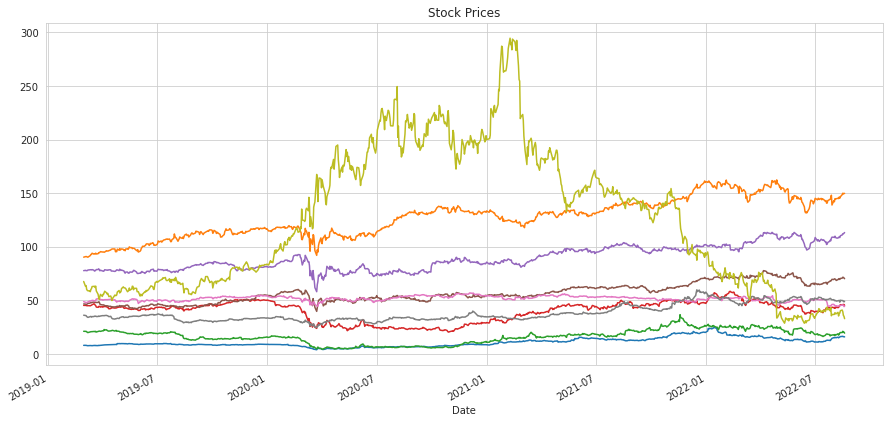

In [482]:
F['Adj Close'].plot(label = 'F', figsize = (15,7))
PG['Adj Close'].plot(label = 'PG')
M['Adj Close'].plot(label = 'M')
WFC['Adj Close'].plot(label = 'WFC')
DUK['Adj Close'].plot(label = 'DUK')
NGG['Adj Close'].plot(label = 'NGG')
VZ['Adj Close'].plot(label = 'VZ')
PFE['Adj Close'].plot(label = 'PFE')
TDOC['Adj Close'].plot(label = 'TDOC')

plt.title('Stock Prices')

# Task 3 - Exploratory Data Analysis (EDA)

In [ ]:
ticker = 'PG' 
PG = yf.Ticker(ticker)
PG.history(period='max')

In [ ]:
        # General Info
PG.get_cashflow()

In [ ]:
#sns.pairplot

In [ ]:
PG.cashflow.plot(figsize=(12,8), title='Historical Cahsflow'+ticker)

In [ ]:
PG.get_balance_sheet()


In [ ]:
PG.balancesheet.plot(figsize=(12,8), title='Historical Cahsflow'+ticker)

In [ ]:
# Now let's plot the total volume of stock being traded each day over the past 5 years
MRNA['Volume'].plot(legend=True,figsize=(10,8))

In [ ]:
PG['Volume'].plot(legend=True,figsize=(10,8))

In [ ]:
# Let's see a historical view of the closing price
MRNA['Adj Close'].plot(legend=True,figsize=(10,4))

In [ ]:
# Now let's plot the total volume of stock being traded each day over the past 5 years
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [ ]:
AAPL.head()

In [ ]:
# We'll use pct_change to find the percent change for each day
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
# Then we'll plot the daily return percentage
AAPL['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

## Write your observations 

In [ ]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

# Could have also done:
#AAPL['Daily Return'].hist()

## Write your observations 

In [ ]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = yf.download(['PG','','MSFT','AMZN'],start,end)['Adj Close']

In [ ]:
# Let's take a quick look
closing_df.head()

In [ ]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()

## Write your observations 

In [ ]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

In [ ]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

In [ ]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

## Write your observations 

In [ ]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.dropna(),annot=True)

In [ ]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
# plt.ylim([0.01,0.025])
# plt.xlim([-0.003,0.004])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops=dict(facecolor='black', shrink=0.05)
        # arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3')
        )

## Write your observations 

In [ ]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [ ]:
# The 0.05 empirical quantile of daily returns
rets['AAPL'].quantile(0.05)

## Write your observations 

# Your final thoughts...